In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
dataset = pd.read_csv('https://raw.githubusercontent.com/vishnuswamynathan/vishnu/main/Melbourne_housing_FULL.csv')

In [3]:
# Number of rows and columns
print(dataset.shape)

# View first few records
dataset.head()

(34857, 21)


Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Identify object columns
print(dataset.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [6]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    dataset[colname] = dataset[colname].astype('category')

In [7]:
# Convert to date object
#dataset['Date'] = pd.to_datetime(dataset['Date'])

In [8]:
dataset.describe().transpose()

count          mean            std          min  \
Rooms          34857.0  3.031012e+00       0.969933      1.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   
Distance       34856.0  1.118493e+01       6.788892      0.00000   
Postcode       34856.0  3.116063e+03     109.023903   3000.00000   
Bedroom2       26640.0  3.084647e+00       0.980690      0.00000   
Bathroom       26631.0  1.624798e+00       0.724212      0.00000   
Car            26129.0  1.728845e+00       1.010771      0.00000   
Landsize       23047.0  5.935990e+02    3398.841946      0.00000   
BuildingArea   13742.0  1.602564e+02     401.267060      0.00000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.00000   
Lattitude      26881.0 -3.781063e+01       0.090279    -38.19043   
Longtitude     26881.0  1.450019e+02       0.120169    144.42379   
Propertycount  34854.0  7.572888e+03    4428.090313     83.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom2            2.00000       3.0000  4.000000e+00  3.000000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  1.200000e+01  
Car                 1.00000       2.0000  2.000000e+00  2.600000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
BuildingArea      102.00000     136.0000  1.880000e+02  4.451500e+04  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Lattitude         -37.86295     -37.8076 -3.775410e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04

In [9]:
# Convert numeric variables to categorical
num_cats = ['Postcode']  

for colname in num_cats:
    dataset[colname] = dataset[colname].astype('category')   

# Confirm changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  object  
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [10]:
# Examine Rooms v Bedroom2
dataset['Rooms v Bedroom2'] = dataset['Rooms'] - dataset['Bedroom2']
dataset

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance Postcode  ...  Car  Landsize  \
0             Jellis   3/09/2016       2.5   3067.0  ...  1.0     126.0   
1             Biggin   3/12/2016       2.5   3067.0  ...  1.0     202.0   
2             Biggin   4/02/2016       2.5   3067.0  ...  0.0     156.0   
3             Rounds   4/02/2016       2.5   3067.0  ...  1.0       0.0   
4             Biggin   4/03/2017       2.5   3067.0  ...  0.0     134.0   
...              ...         ...       ...      ...  ...  ...       ...   
34852            Jas  24/02/2018       6.3   3013.0  ...  3.0     593.0   
34853        Sweeney  24/02/2018       6.3   3013.0  ...  1.0      98.0   
34854            Jas  24/02/2018       6.3   3013.0  ...  2.0     220.0   
34855  hockingstuart  24/02/2018       6.3   3013.0  ...  NaN       NaN   
34856             RW  24/02/2018       6.3   3013.0  ...  0.0     250.0   

       BuildingArea  YearBuilt               CouncilArea  Lattitude  \
0               NaN        NaN        Yarra City Council  -37.80140   
1               NaN        NaN        Yarra City Council  -37.79960   
2              79.0     1900.0        Yarra City Council  -37.80790   
3               NaN        NaN        Yarra City Council  -37.81140   
4             150.0     1900.0        Yarra City Council  -37.80930   
...             ...        ...                       ...        ...   
34852           NaN        NaN  Maribyrnong City Council  -37.81053   
34853         104.0     2018.0  Maribyrnong City Council  -37.81551   
34854         120.0     2000.0  Maribyrnong City Council  -37.82286   
34855           NaN        NaN  Maribyrnong City Council        NaN   
34856         103.0     1930.0  Maribyrnong City Council  -37.81810   

      Longtitude             Regionname  Propertycount Rooms v Bedroom2  
0      144.99580  Northern Metropolitan         4019.0              0.0  
1      144.99840  Northern Metropolitan         4019.0              0.0  
2      144.99340  Northern Metropolitan         4019.0              0.0  
3      145.01160  Northern Metropolitan         4019.0              0.0  
4      144.99440  Northern Metropolitan         4019.0              0.0  
...          ...                    ...            ...              ...  
34852  144.88467   Western Metropolitan         6543.0              0.0  
34853  144.88826   Western Metropolitan         6543.0              0.0  
34854  144.87856   Western Metropolitan         6543.0              0.0  
34855        NaN   Western Metropolitan         6543.0              NaN  
34856  144.89351   Western Metropolitan         6543.0              0.0  

[34857 rows x 22 columns]

In [11]:
# Drop columns
dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1)

C:\Users\vishn\AppData\Local\Temp\ipykernel_27048\3887436178.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1)


In [12]:
# Add age variable
dataset['Age'] = 2017 - dataset['YearBuilt']

# Identify historic homes
dataset['Historic'] = np.where(dataset['Age']>=50,'Historic','Contemporary')

# Convert to Category
dataset['Historic'] = dataset['Historic'].astype('category')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  object  
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13742 non-null  float64 
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Lattitude      26881 non-null  float64 
 17  Longtitude     26881 non-null  

In [14]:
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

In [15]:
# Percentage of missing values
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

In [16]:
# Remove rows missing data
dataset = dataset.dropna()

# Confirm that observations missing data were removed  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         8887 non-null   category
 1   Address        8887 non-null   category
 2   Rooms          8887 non-null   int64   
 3   Type           8887 non-null   category
 4   Price          8887 non-null   float64 
 5   Method         8887 non-null   category
 6   SellerG        8887 non-null   category
 7   Date           8887 non-null   object  
 8   Distance       8887 non-null   float64 
 9   Postcode       8887 non-null   category
 10  Bathroom       8887 non-null   float64 
 11  Car            8887 non-null   float64 
 12  Landsize       8887 non-null   float64 
 13  BuildingArea   8887 non-null   float64 
 14  YearBuilt      8887 non-null   float64 
 15  CouncilArea    8887 non-null   category
 16  Lattitude      8887 non-null   float64 
 17  Longtitude     8887 non-null   f

In [17]:
dataset.describe().transpose()

count          mean            std           min  \
Rooms          8887.0  3.098909e+00       0.963786       1.00000   
Price          8887.0  1.092902e+06  679381.904112  131000.00000   
Distance       8887.0  1.119989e+01       6.813402       0.00000   
Bathroom       8887.0  1.646450e+00       0.721611       1.00000   
Car            8887.0  1.692247e+00       0.975464       0.00000   
Landsize       8887.0  5.234804e+02    1061.324228       0.00000   
BuildingArea   8887.0  1.493095e+02      87.925580       0.00000   
YearBuilt      8887.0  1.965753e+03      37.040876    1196.00000   
Lattitude      8887.0 -3.780450e+01       0.090549     -38.17436   
Longtitude     8887.0  1.449914e+02       0.118919     144.42379   
Propertycount  8887.0  7.475940e+03    4375.024364     249.00000   
Age            8887.0  5.124665e+01      37.040876      -2.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.200000e+01  
Price          641000.00000  900000.0000  1.345000e+06  9.000000e+06  
Distance            6.40000      10.2000  1.390000e+01  4.740000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  9.000000e+00  
Car                 1.00000       2.0000  2.000000e+00  1.000000e+01  
Landsize          212.00000     478.0000  6.520000e+02  4.280000e+04  
BuildingArea      100.00000     132.0000  1.800000e+02  3.112000e+03  
YearBuilt        1945.00000    1970.0000  2.000000e+03  2.019000e+03  
Lattitude         -37.85856     -37.7987 -3.774894e+01 -3.740720e+01  
Longtitude        144.92000     144.9985  1.450646e+02  1.455264e+02  
Propertycount    4382.50000    6567.0000  1.033100e+04  2.165000e+04  
Age                17.00000      47.0000  7.200000e+01  8.210000e+02

In [18]:
dataset[dataset['Age']>800]

Suburb         Address  Rooms Type      Price Method  SellerG  \
16424  Mount Waverley  5 Armstrong St      3    h  1200000.0     VB  McGrath   

             Date  Distance Postcode  ...  Landsize  BuildingArea  YearBuilt  \
16424  24/06/2017      14.2   3149.0  ...     807.0         117.0     1196.0   

               CouncilArea  Lattitude Longtitude            Regionname  \
16424  Monash City Council  -37.86788  145.12121  Eastern Metropolitan   

       Propertycount    Age  Historic  
16424        13366.0  821.0  Historic  

[1 rows x 22 columns]

In [19]:
# selecting all the rows in a DataFrame where the value in the 'BuildingArea' column is equal to 0.
dataset[dataset['BuildingArea']==0]

Suburb            Address  Rooms Type      Price Method  \
7211   North Melbourne       19 Shands La      2    t   841000.0      S   
19775     Balwyn North      14 Wanbrow Av      5    h  1950000.0      S   
19840         Bundoora      22 Moreton Cr      3    h   814000.0      S   
20223    Roxburgh Park     16 Sandover Dr      4    h   570000.0      S   
20262        Thornbury  19/337 Station St      3    t   900000.0     VB   
22040          Prahran      6 Aberdeen Rd      3    h  1390000.0      S   
22507      Huntingdale     33 Beauford St      3    h  1205000.0     SA   
22931     Balwyn North        1 Hosken St      5    h  2800000.0      S   
22994    Brighton East      60 Cummins Rd      3    h  1650000.0     SP   
23022         Bundoora    37 Greenwood Dr      4    h   815000.0      S   
23085      Craigieburn       28 Powell St      3    h   412500.0      S   
23115           Epping      26 Lowalde Dr      3    h   595000.0      S   
23159        Glen Iris          6 Viva St      4    h  2690000.0     PI   
23242              Kew      16 Hodgson St      5    h  3450000.0     PI   
23250          Kilsyth   17 Birkenhead Dr      3    h   803000.0      S   
23321        Moorabbin         7 Walsh Av      3    h  1290000.0      S   
23378   Port Melbourne       44 Garton St      4    t  2455000.0     SP   
23654       Cheltenham        5 Hannah St      3    h   975000.0      S   
23690      Craigieburn     18 Pymble Gdns      4    h   590000.0      S   
24116         Werribee        21 Sinns Av      3    h   550000.0      S   
24196     Balwyn North      5 Highview Rd      4    h  1500000.0     VB   
24205        Bentleigh     1 Donaldson St      3    h  1730000.0      S   
24344          Donvale       29 Martha St      2    h  1070000.0      S   
24602        Northcote      155 Clarke St      3    h  2750000.0     VB   
25086        Glen Iris     60 Hortense St      4    h  2237500.0      S   
25320        Reservoir     12 Kelverne St      3    h   650000.0     SP   
25352    Roxburgh Park      15 Donvale Av      3    h   470000.0      S   
25376        Spotswood     104 Hudsons Rd      2    h  1225000.0     SP   
25412          Tarneit    10 Discovery Dr      4    h   585000.0      S   
25708         Bundoora        8 Oxford Dr      3    h   770000.0      S   
26343          Preston      148 Albert St      3    h   833000.0      S   
26633      Craigieburn     31 Yarcombe Cr      4    h   540000.0      S   
27441        Yallambie        21 Lowan Av      5    h   990000.0      S   
27564    Brighton East      15 Bayview Rd      3    t   950000.0     VB   
27587   Brunswick West      1/1 Duggan St      2    u   420500.0     SP   
27629           Carrum       18 Church Rd      4    h   980000.0      S   
27922            Lalor        2 Orchid Ct      5    h   591000.0      S   
30914          Wollert      21 Dalwood Wy      4    h   609000.0      S   
31464     Balwyn North      4 Beverley Ct      4    t  1190000.0     VB   
31509  Blackburn South    5 Abercromby Rd      4    h  1400000.0     VB   
31541        Brunswick       3 Austral Av      4    h  1500000.0     VB   
31717           Epping         28 Bail St      3    h   600000.0      S   
32403    Roxburgh Park      23 Wrigley Cr      4    h   622000.0      S   
33397        Greenvale      26 Perugia Av      4    h   677000.0      S   
33899          Wollert    40 Whitebark St      4    h   615000.0      S   

             SellerG        Date  Distance Postcode  ...  Landsize  \
7211          Jellis   4/03/2017       2.3   3051.0  ...     215.0   
19775             RT   3/09/2017       9.7   3104.0  ...     743.0   
19840          Barry   3/09/2017      12.1   3083.0  ...     542.0   
20223          Raine   3/09/2017      20.6   3064.0  ...     504.0   
20262         Jellis   3/09/2017       7.0   3071.0  ...     120.0   
22040       Marshall  19/08/2017       4.6   3181.0  ...     125.0   
22507             FN  23/09/2017      12.3   3166.0  ...     622.0   
22931

In [20]:
#  selecting all the rows in a DataFrame where the value in the 'Landsize' column is equal to 0.
dataset[dataset['Landsize']==0]

Suburb              Address  Rooms Type     Price Method  \
25       Abbotsford  123/56 Nicholson St      2    u  750000.0      S   
42       Abbotsford   6/219 Nicholson St      2    u  500000.0      S   
57       Abbotsford      11/205 Gipps St      1    u  470000.0      S   
67     Airport West        50 Bedford St      3    h  730000.0     VB   
68     Airport West        50 Bedford St      3    h  770000.0     SP   
...             ...                  ...    ...  ...       ...    ...   
19678   South Yarra       9/17 Howitt St      2    u  570000.0     VB   
19685      St Kilda    45/151 Fitzroy St      2    u  600000.0     VB   
19710   Tullamarine     9/200 Melrose Dr      2    u  300000.0     SP   
19734  Williamstown        2/29 Dover Rd      1    u  385000.0     SP   
19736       Windsor      201/152 Peel St      2    u  560000.0     PI   

             SellerG        Date  Distance Postcode  ...  Landsize  \
25            Biggin  12/11/2016       2.5   3067.0  ...       0.0   
42           Collins  18/06/2016       2.5   3067.0  ...       0.0   
57            Nelson  26/07/2016       2.5   3067.0  ...       0.0   
67            Nelson   3/12/2016      13.5   3042.0  ...       0.0   
68            Nelson   4/03/2017      13.5   3042.0  ...       0.0   
...              ...         ...       ...      ...  ...       ...   
19678            Ray  29/07/2017       2.7   3141.0  ...       0.0   
19685  hockingstuart  29/07/2017       5.0   3182.0  ...       0.0   
19710          Jason  29/07/2017      12.9   3043.0  ...       0.0   
19734       Williams  29/07/2017       6.8   3016.0  ...       0.0   
19736  hockingstuart  29/07/2017       4.6   3181.0  ...       0.0   

       BuildingArea  YearBuilt                 CouncilArea  Lattitude  \
25            94.00     2009.0          Yarra City Council  -37.80780   
42            60.00     1970.0          Yarra City Council  -37.80150   
57            50.00     2013.0          Yarra City Council  -37.80550   
67           145.00     1965.0  Moonee Valley City Council  -37.72030   
68           145.00     1965.0  Moonee Valley City Council  -37.72030   
...             ...        ...                         ...        ...   
19678         64.00     1965.0      Melbourne City Council  -37.84679   
19685         82.00     1930.0   Port Phillip City Council  -37.85911   
19710         66.32     1980.0       Brimbank City Council  -37.69815   
19734         35.64     1967.0    Hobsons Bay City Council  -37.85588   
19736         61.60     2012.0   Port Phillip City Council  -37.85581   

      Longtitude             Regionname  Propertycount   Age      Historic  
25     144.99650  Northern Metropolitan         4019.0   8.0  Contemporary  
42     144.99720  Northern Metropolitan         4019.0  47.0  Contemporary  
57     144.99610  Northern Metropolitan         4019.0   4.0  Contemporary  
67     144.87550   Western Metropolitan         3464.0  52.0      Historic  
68     144.87550   Western Metropolitan         3464.0  52.0      Historic  
...          ...                    ...            ...   ...           ...  
19678  145.00206  Southern Metropolitan        14887.0  52.0      Historic  
19685  144.97900  Southern Metropolitan        13240.0  87.0      Historic  
19710  144.88019   Western Metropolitan         3296.0  37.0  Contemporary  
19734  144.89936   Western Metropolitan         6380.0  50.0      Historic  
19736  144.99025  Southern Metropolitan         4380.0   5.0  Contemporary  

[1015 rows x 22 columns]

In [21]:
# Remove outlier
dataset = dataset[dataset['BuildingArea']!=0]

# Confirm removal
dataset.describe().transpose()

count          mean            std           min  \
Rooms          8842.0  3.096811e+00       0.964072       1.00000   
Price          8842.0  1.092554e+06  679110.471353  131000.00000   
Distance       8842.0  1.118741e+01       6.810991       0.00000   
Bathroom       8842.0  1.645781e+00       0.722307       1.00000   
Car            8842.0  1.691812e+00       0.976664       0.00000   
Landsize       8842.0  5.229755e+02    1062.597994       0.00000   
BuildingArea   8842.0  1.500694e+02      87.499764       1.00000   
YearBuilt      8842.0  1.965692e+03      37.057287    1196.00000   
Lattitude      8842.0 -3.780468e+01       0.090367     -38.17436   
Longtitude     8842.0  1.449913e+02       0.118965     144.42379   
Propertycount  8842.0  7.471581e+03    4374.504418     249.00000   
Age            8842.0  5.130808e+01      37.057287      -2.00000   

                         25%          50%           75%           max  
Rooms               2.000000       3.0000  4.000000e+00  1.200000e+01  
Price          641250.000000  900000.0000  1.345000e+06  9.000000e+06  
Distance            6.400000      10.2000  1.390000e+01  4.740000e+01  
Bathroom            1.000000       2.0000  2.000000e+00  9.000000e+00  
Car                 1.000000       2.0000  2.000000e+00  1.000000e+01  
Landsize          211.000000     477.0000  6.520000e+02  4.280000e+04  
BuildingArea      100.000000     132.0000  1.800000e+02  3.112000e+03  
YearBuilt        1945.000000    1970.0000  2.000000e+03  2.019000e+03  
Lattitude         -37.858788     -37.7987 -3.774930e+01 -3.740720e+01  
Longtitude        144.919700     144.9983  1.450645e+02  1.455264e+02  
Propertycount    4380.000000    6567.0000  1.033100e+04  2.165000e+04  
Age                17.000000      47.0000  7.200000e+01  8.210000e+02

In [22]:
# Abbreviate Regionname categories
dataset['Regionname'] = dataset['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

In [23]:
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

# Evaluating Models

LINEAR REGRESSSION

In [24]:
# Displaying the numerical features in the dataset
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [25]:
# Split
# Create features variable 
X =dataset[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

# Create target variable. 
y = dataset['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [26]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse_linear = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

MAE: 312564.46670670237
MSE: 221083216258.2572
RMSE: 470194.8705146167


In [29]:
# Calculated R Squared
rsquared_linear = metrics.explained_variance_score(y_test,y_pred)
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5216286297986982


In [30]:
# coefficients of the linear regression modelthe coefficients of the linear regression model with the variable names 
# as the index and the corresponding coefficients as the values in the 'Coefficients' column. 
# This is useful for interpreting the impact of each variable on the outcome of the regression model.

cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

Coefficients
Rooms          130781.994615
Distance       -28481.473952
Bathroom       255950.485267
Car             49936.398377
Landsize           24.128532
BuildingArea     2160.118289
Propertycount      -1.229619
Age              5491.481614

In [31]:
# Using XGBoost to evaluate model

import xgboost as xgb

xgbr = xgb.XGBRegressor();
xgbr.fit(X_train, y_train);
xgbr_pred = xgbr.predict(X_test);

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgbr_pred)) ;
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgbr_pred)); 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgbr_pred)));

print('R^2 =',metrics.explained_variance_score(y_test,xgbr_pred))

rmse_xgrad = np.sqrt(metrics.mean_squared_error(y_test, xgbr_pred))
rsquared_xgb = metrics.explained_variance_score(y_test,xgbr_pred)

Mean Absolute Error: 187991.43671389204
Mean Squared Error: 105413201879.23979
Root Mean Squared Error: 324673.9932289616
R^2 = 0.7719840104270375


In [32]:
# Using RandomForestRegressor to evaluate model

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


regressor = RandomForestRegressor(n_estimators = 50, random_state = 0);
# training the random forest regressor model.
regressor.fit(X_train, y_train.values.ravel());
# Predicting the Test set results
rftree_pred = regressor.predict(X_test);

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rftree_pred))  ;
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rftree_pred)) ; 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rftree_pred)));
print('R^2 =',metrics.explained_variance_score(y_test,rftree_pred))

rmse_random = np.sqrt(metrics.mean_squared_error(y_test, rftree_pred))
rsquared_randomForest = metrics.explained_variance_score(y_test,rftree_pred)

Mean Absolute Error: 220383.9194260949
Mean Squared Error: 129864085330.87637
Root Mean Squared Error: 360366.598522777
R^2 = 0.7196778218583497


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegressionCV
from sklearn.metrics import mean_squared_error

In [34]:
# Using the training dataset build 100 L1-regularized linear models corresponding to 100 regularization coefficients evenly
# spaced between 0.001 and 0.1. and using the 10-fold cross validation 

linear_l1models = LassoCV(cv = 10, alphas = np.linspace(0.001,0.1,100));
linear_l1models.fit(X_train, y_train.values.ravel());

print('alpha :\t ', linear_l1models.alpha_); 
print('intercept :\t ', linear_l1models.intercept_);

print(list(X.columns.values));
print(linear_l1models.coef_);

# Lasso (best alpha) - training RMSE

lasso_best_alpha_training_prediction = linear_l1models.predict(X_train);
mse_lasso_training_prediction = mean_squared_error(y_train, lasso_best_alpha_training_prediction);
print('Lasso (best alpha) - training RMSE : \t ', np.sqrt(mse_lasso_training_prediction));
print('\n');

# Lasso (best alpha) - testing RMSE

lasso_best_alpha_testing_prediction = linear_l1models.predict(X_test);
mse_lasso_testing_prediction = mean_squared_error(y_test, lasso_best_alpha_testing_prediction);
print('Lasso (best alpha) - testing RMSE : \t ', np.sqrt(mse_lasso_testing_prediction));
print('\n');

alpha :	  0.001
intercept :	  -107966.98258586088
['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Age']
[ 1.30781994e+05 -2.84814739e+04  2.55950483e+05  4.99363975e+04
  2.41285324e+01  2.16011831e+03 -1.22961937e+00  5.49148161e+03]
Lasso (best alpha) - training RMSE : 	  463085.55538721854


Lasso (best alpha) - testing RMSE : 	  470194.87034166063




In [35]:
# Lasso (best alpha) - training RMSE

lasso_best_alpha_training_prediction = linear_l1models.predict(X_train);
mse_lasso_training_prediction = mean_squared_error(y_train, lasso_best_alpha_training_prediction);
print('Lasso (best alpha) - training RMSE : \t ', np.sqrt(mse_lasso_training_prediction));
print('\n');

# Lasso (best alpha) - testing RMSE

lasso_best_alpha_testing_prediction = linear_l1models.predict(X_test);
mse_lasso_testing_prediction = mean_squared_error(y_test, lasso_best_alpha_testing_prediction);
print('Lasso (best alpha) - testing RMSE : \t ', np.sqrt(mse_lasso_testing_prediction));
print('\n');

# Lasso (best alpha) - average RMSE obtained by averaging the 10 RMSEs obtained during cross-validation

models_alpha = linear_l1models.alphas_.tolist().index(linear_l1models.alpha_);
mean_RMSE = np.sqrt(linear_l1models.mse_path_.mean(axis=1))[models_alpha];

print('Lasso (best alpha) - average RMSE :\t ', mean_RMSE);
print('\n');
rmse_lasso = mean_RMSE

# Provide the 95% confidence interval in the above mean (you will need to compute the Standard Error)

standard_deviation_RMSE = np.sqrt(linear_l1models.mse_path_.std(axis=1))[models_alpha];
standard_error_mean = standard_deviation_RMSE/np.sqrt(linear_l1models.mse_path_.shape[1]);
print(' 95% confidence interval RMSE : \t [', mean_RMSE - 1.96 * standard_error_mean, ', ', mean_RMSE + 1.96 * standard_error_mean, ']');
print('\n');
rsquared_lasso = metrics.explained_variance_score(y_test,lasso_best_alpha_testing_prediction)
print(rsquared_lasso)

Lasso (best alpha) - training RMSE : 	  463085.55538721854


Lasso (best alpha) - testing RMSE : 	  470194.87034166063


Lasso (best alpha) - average RMSE :	  468947.992206845


 95% confidence interval RMSE : 	 [ 313282.59216207935 ,  624613.3922516108 ]


0.5216286301512363


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Defining the model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluating the model on the training set
train_loss = model.evaluate(X_train, y_train, verbose=0)
print('Neural Network - training RMSE : \t ', np.sqrt(train_loss))

# Evaluating the model on the testing set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Neural Network - testing RMSE : \t ', np.sqrt(test_loss))

# predicting the target variable on the test set
y_pred = model.predict(X_test)

# calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
rmse_neural = rmse

# calculating R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
rsquared_neural = metrics.explained_variance_score(y_test,y_pred)
print('rsquared_neural')
print(rsquared_neural)

Neural Network - training RMSE : 	  777360.2185036227
Neural Network - testing RMSE : 	  790447.5814018283
56/56 [==============================] - 0s 2ms/step
RMSE: 790447.5558508849
R2 score: -0.352066144800143
rsquared_neural
-0.2666676185555339


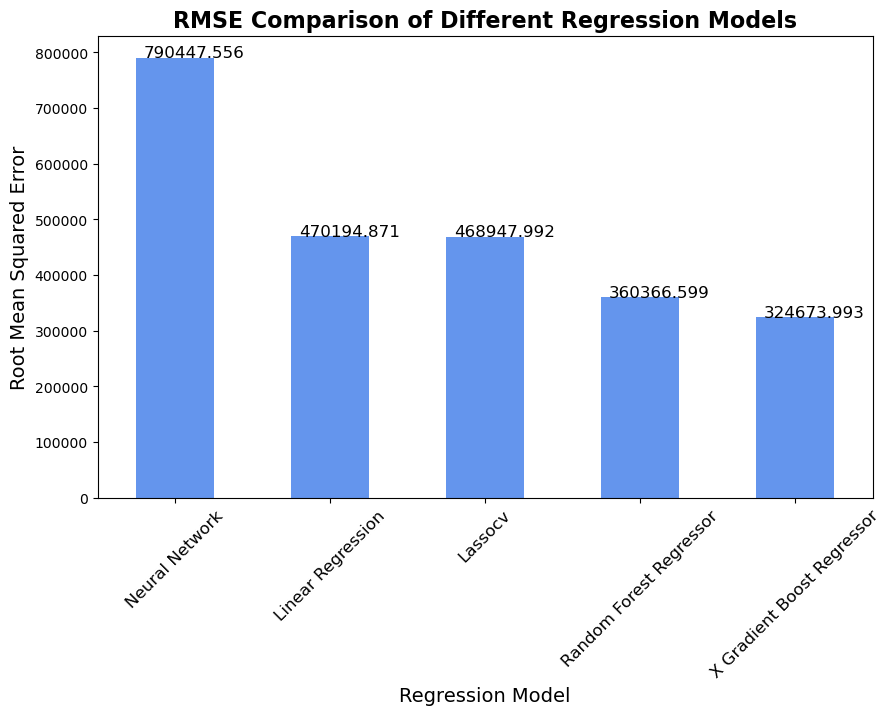

In [37]:
import matplotlib.pyplot as plt

# Create a dictionary of model names and their respective RMSE scores
rmse_scores = {'Linear Regression': rmse_linear,
               'Lassocv': rmse_lasso,
               'Random Forest Regressor': rmse_random,
               'X Gradient Boost Regressor' :rmse_xgrad,
               'Neural Network': rmse_neural}

# Convert dictionary to a pandas dataframe for easy plotting
import pandas as pd
df = pd.DataFrame.from_dict(rmse_scores, orient='index', columns=['RMSE'])

# Sort the dataframe in descending order of RMSE
df_sorted = df.sort_values('RMSE', ascending=False)

# Plot the bar chart
ax = df_sorted.plot(kind='bar', figsize=(10,6), legend=False, color='cornflowerblue')

# Set plot title and axis labels
ax.set_title('RMSE Comparison of Different Regression Models', fontsize=16, fontweight='bold')
ax.set_xlabel('Regression Model', fontsize=14)
ax.set_ylabel('Root Mean Squared Error', fontsize=14)

# Set the x-tick labels and rotate them for better readability
ax.set_xticklabels(df_sorted.index, rotation=45, fontsize=12)

# Add the RMSE value above each bar
for i, v in enumerate(df_sorted['RMSE']):
    ax.text(i-0.2, v+0.01, str(round(v, 3)), fontsize=12)

# Show the plot
plt.show()


We have evaluated 5 models such as LinearRegression, LassoCV, RandomRegressor, XGBoost and NeuralNet. 

We have also compared the RMSE values for all teh 5 models. We will be comapring the best and worst models further in the next assignment.

# Linear Regression model is selected as a baseline model.

# What dataset did you choose, and how did that impact your model selection ? 
  Our dataset is Melbourne Housing Dataset from Kaggle. We selected this dataset to analyze the Melbourne Housing Dataset, to identify the key factors that influence the price of a property as well as identifying trends and patterns in the real estate market.To predict future housing prices, To provide insights into how the real estate market is likely to evolve in the future, using machine learning models.

# Which models did you select?
1)  Linear Regression
2)  Random Forest
3)  X Graient Boosting
4)  Neural Network
5)  LassoCV

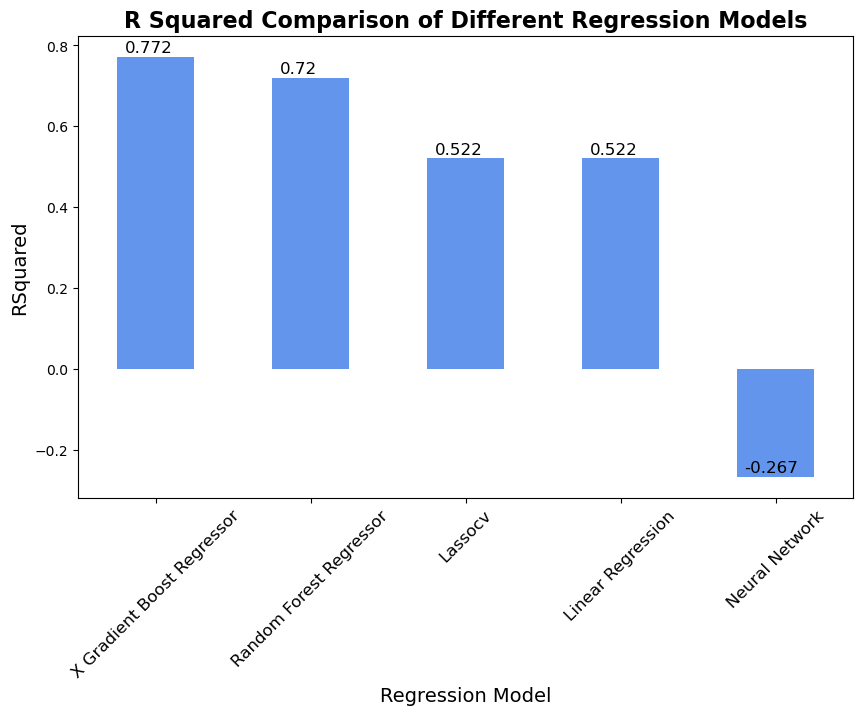

In [38]:
import matplotlib.pyplot as plt

# Create a dictionary of model names and their respective RMSE scores
rsqaured_scores = {'Linear Regression': rsquared_linear,
               'Lassocv': rsquared_lasso,
               'Random Forest Regressor': rsquared_randomForest ,
               'X Gradient Boost Regressor' :rsquared_xgb,
               'Neural Network': rsquared_neural}

# Convert dictionary to a pandas dataframe for easy plotting
import pandas as pd
df = pd.DataFrame.from_dict(rsqaured_scores, orient='index', columns=['RSquared'])

# Sort the dataframe in descending order of RMSE
df_sorted = df.sort_values('RSquared', ascending=False)

# Plot the bar chart
ax = df_sorted.plot(kind='bar', figsize=(10,6), legend=False, color='cornflowerblue')

# Set plot title and axis labels
ax.set_title('R Squared Comparison of Different Regression Models', fontsize=16, fontweight='bold')
ax.set_xlabel('Regression Model', fontsize=14)
ax.set_ylabel('RSquared', fontsize=14)

# Set the x-tick labels and rotate them for better readability
ax.set_xticklabels(df_sorted.index, rotation=45, fontsize=12)

# Add the RMSE value above each bar
for i, v in enumerate(df_sorted['RSquared']):
    ax.text(i-0.2, v+0.01, str(round(v, 3)), fontsize=12)

# Show the plot
plt.show()


# What is the best and worst model?
  
  To evaluate the performance of our selected regression models for predicting housing prices, we used two commonly used metrics - RMSE (root mean squared error) and R-squared. We plotted the performance of each model in a bar chart, which helped us to visually compare the performance of the different models.

We found that the X Gradient Boost Regressor had the " highest R-squared value and the lowest RMSE value ", indicating that it was the best fit for our data among the models we evaluated. On the other hand, we found that the Neural Network model did not perform as well for our data as compared to the other models.

Overall, we believe that our analysis provides useful insights into the performance of different regression models for predicting housing prices. We recommend using the X Gradient Boost Regressor model for future predictions of housing prices, based on our analysis.

# Why do you think the best model performed best?

        
We believe that the reason why XGBoost performed well on our Melbourne housing dataset is due to several factors. Firstly, our dataset contained missing data and outliers, which can be challenging for many machine learning algorithms. XGBoost is known for its ability to handle these types of data well, which could have contributed to its good performance.

Furthermore, our dataset had a large number of features and records (21 columns and 35000 rows), which XGBoost is capable of handling efficiently. This allowed us to take advantage of the algorithm's speed and scalability.

Another important factor is XGBoost's regularization parameter, which helps to prevent overfitting and improve the model's generalization performance on unseen data. This can be especially important when working with complex datasets like the Melbourne housing dataset, which may require a more robust model to handle the variety of features and patterns in the data.

# What would you do in the next iteration of this project?
We used the features provided in the dataset without much feature engineering in our project. We can investigate generating new features or altering current features in the future iteration to better capture the underlying patterns in the data. Cleaning data is an essential step in any machine learning effort.

We can investigate more advanced strategies for dealing with missing values, outliers, and other data quality issues in the next iteration.While we did some hyperparameter adjustment in this project, there is still room to experiment with a broader set of hyperparameters to discover the best combination for the models we chose.

By addressing these issues in the future version, we will be able to improve the performance of our models and acquire a better understanding of the factors that drive house prices.

# What have you learned from this project?

Throughout this project, I have learned several key aspects related to machine learning model selection and evaluation. One of the most important things I learned is the importance of selecting the right evaluation metric for the problem at hand. 

Another important aspect that I learned is the use of cross-validation to evaluate the performance of different models and select the best one. By splitting the dataset into training and validation sets multiple times and evaluating the models on each split, we can reduce the risk of overfitting and obtain a more reliable estimate of the model's performance.

I also learned the importance of interpreting the model's results and understanding the factors that contribute to the model's predictions. 

Overall, this project has provided me with a good introduction to ML model selection and evaluation and highlighted the importance of careful data preparation, model selection, and evaluation to achieve accurate predictions.